# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_agg = study_results.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Metastatic Sites': 'mean'
}).reset_index()

combined_data = pd.merge(mouse_metadata, study_results_agg, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,32.358859,0.8
1,s185,Capomulin,Female,3,17,34.559143,0.4
2,x401,Capomulin,Female,16,15,36.182040,0.0
3,m601,Capomulin,Male,22,17,34.847470,0.9
4,g791,Ramicane,Male,11,16,37.489237,0.5


In [3]:
# Checking the number of mice.
number_of_mice = len(combined_data)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicates
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset="Mouse ID")

# Display the cleaned data
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,32.358859,0.8
1,s185,Capomulin,Female,3,17,34.559143,0.4
2,x401,Capomulin,Female,16,15,36.182040,0.0
3,m601,Capomulin,Male,22,17,34.847470,0.9
4,g791,Ramicane,Male,11,16,37.489237,0.5


In [13]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data)

249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = combined_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_Std_Err=('Tumor Volume (mm3)', 'sem')
)

regimen_stats.columns = [
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Tumor Volume Variance', 
    'Tumor Volume Std. Dev.', 
    'Tumor Volume Std. Err.'
]

regimen_stats = regimen_stats.reset_index()

regimen_stats

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.755487,41.384825,10.529290,3.244887,0.648977
1,Ceftamin,50.827485,52.128041,14.040506,3.747066,0.749413
2,Infubinol,51.383443,51.897959,17.380408,4.168982,0.833796
3,Ketapril,53.432527,53.725479,24.086484,4.907798,0.981560
4,Naftisol,52.499395,53.353053,22.886774,4.784012,0.956802
5,Placebo,52.540611,53.392180,19.610351,4.428358,0.885672
6,Propriva,50.557868,49.923649,15.117558,3.888130,0.777626
7,Ramicane,40.555988,40.108578,10.256711,3.202610,0.640522
8,Stelasyn,52.662319,52.651204,22.147071,4.706067,0.960622
9,Zoniferol,51.562955,52.437635,16.782584,4.096655,0.819331


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

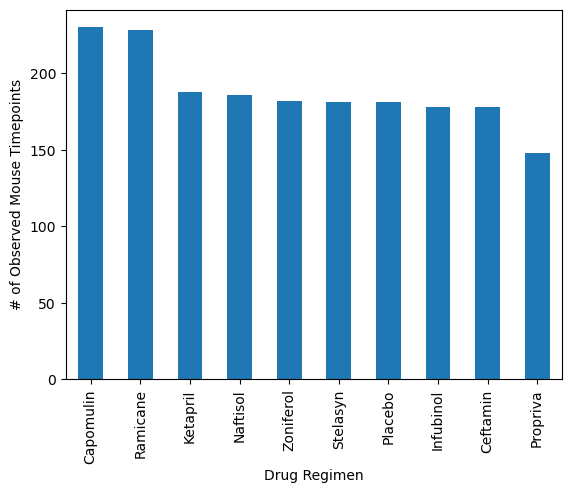

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
combined_data2 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
row_counts = combined_data2.groupby('Drug Regimen').size()

# Create a bar plot
row_counts.plot(kind='bar', figsize=(7, 7), color='blue')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

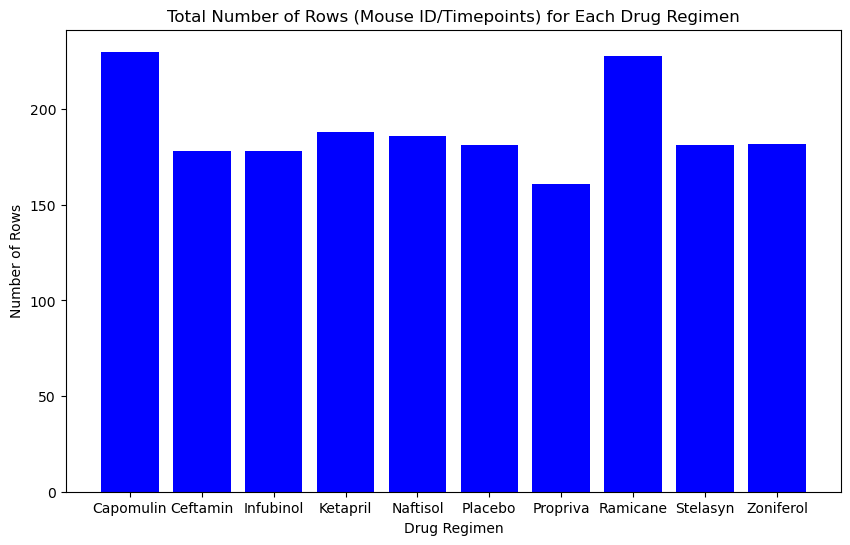

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
row_counts = combined_data2.groupby('Drug Regimen').size()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(row_counts.index, row_counts.values, color='blue')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()


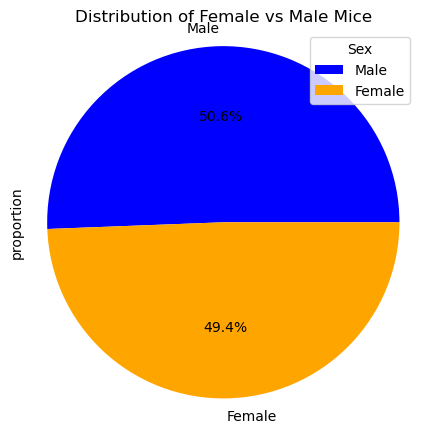

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_counts = combined_data2['Sex'].value_counts('Sex')

# Create a pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], figsize=(5, 5))
plt.title('Distribution of Female vs Male Mice')
plt.legend(title='Sex', loc='upper right')
plt.axis('equal')

plt.show()

# I'm not sure how to change the part that says proportion on the side to say Sex


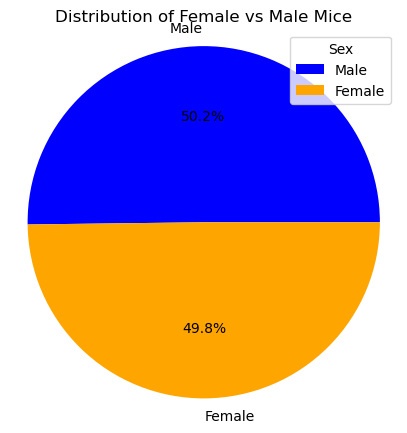

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = combined_data['Sex'].value_counts()

# Create the pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.legend(title='Sex', loc='upper right')
plt.axis('equal')


plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [46]:
last_timepoints = combined_data2.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, combined_data2, on=['Mouse ID', 'Timepoint'], how='left')

# Step 3: Filter the data for the specific treatment regimens
filtered_data = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the result
filtered_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
last_timepoints = combined_data2.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = pd.merge(last_timepoints, combined_data2, on=['Mouse ID', 'Timepoint'], how='left')
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Locate potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}\n")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



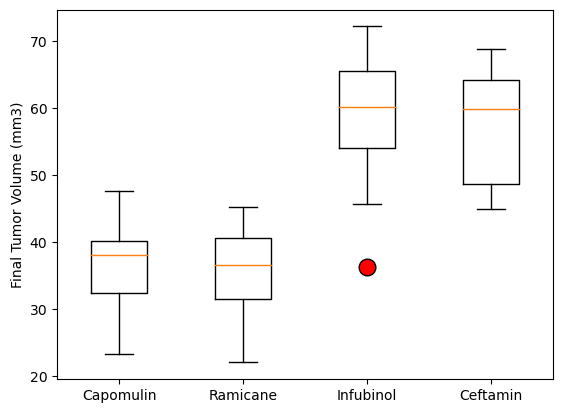

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, patch_artist=True, 
                    )

plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

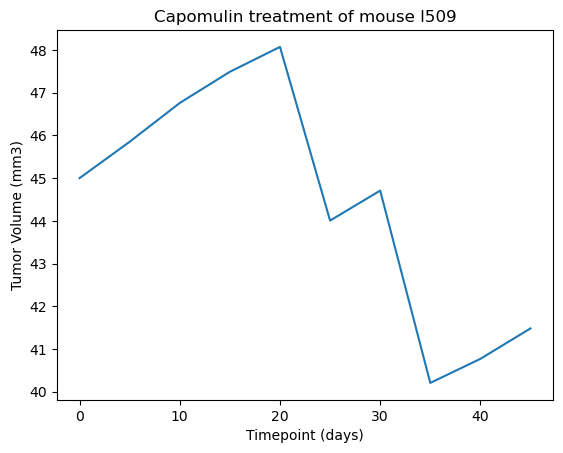

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


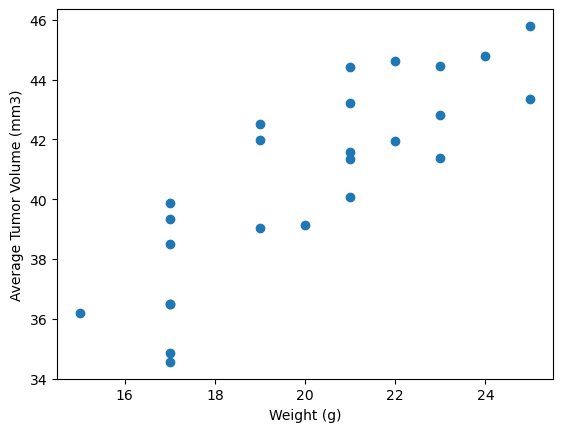

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


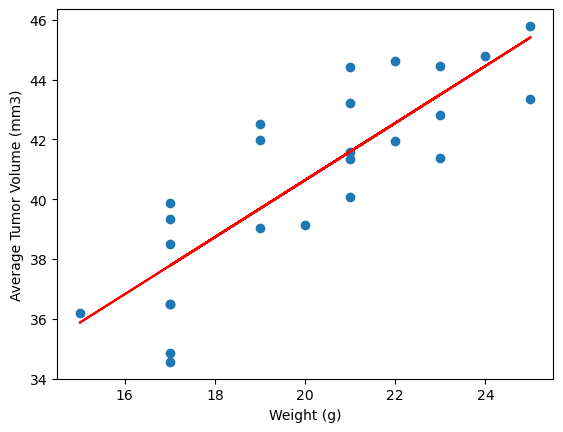

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
